In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_rows', 5)
%matplotlib inline

## 階層的クラスタリング (hierarchical clustering)
---
データを構造的に分割する手法。

In [2]:
arrests = pd.read_csv('data/USArrests.csv', index_col=0)
print('arrests')
display(arrests)

arrests


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
...,...,...,...,...
Wisconsin,2.6,53,66,10.8
Wyoming,6.8,161,60,15.6


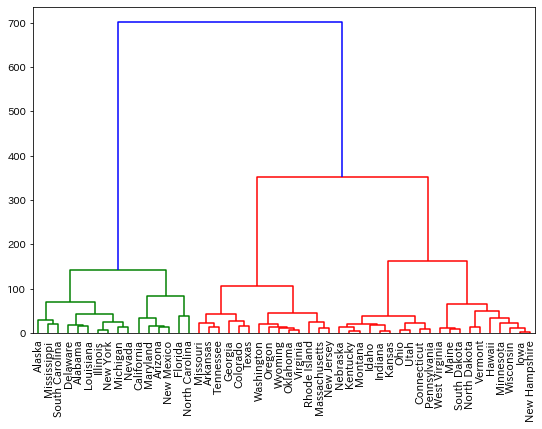

In [3]:
from my_functions.hierarchical_clustering import visualization
visualization.show(arrests, arrests.index)

## Pythonでの階層的クラスタリング実行方法
---
`scipy.cluster.hierarchy.linkage`や`sklearn.cluster.AgglomerativeClustering`を、可視化には`scipy.cluster.hierarchy.dendrogram`を用いる。  
よほど特殊な事情がなければ`scipy`を使ったほうがよい。

In [4]:
iris = sns.load_dataset('iris').sample(n=40, random_state=1234).sort_index()
print('iris')
display(iris)

iris


,sepal_length,sepal_width,petal_length,petal_width,species
6,4.6,3.4,1.4,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa
...,...,...,...,...,...
126,6.2,2.8,4.8,1.8,virginica
133,6.3,2.8,5.1,1.5,virginica


In [5]:
linkage??

In [6]:
dendrogram??

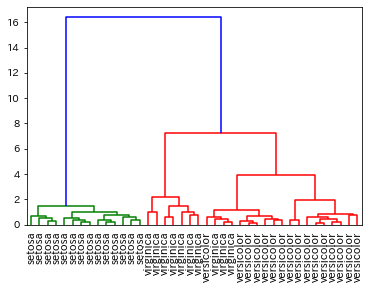

In [7]:
Z = linkage(iris.loc[:, 'sepal_length':'petal_width'].values, 'ward')
dendrogram(
    Z,
    labels=iris['species'].values,
    leaf_rotation='vertical',
    leaf_font_size=11)
plt.show()

In [8]:
AgglomerativeClustering??

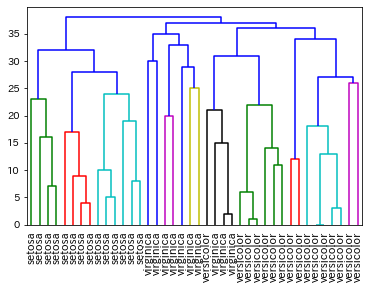

In [9]:
model = AgglomerativeClustering(linkage='ward')
model.fit(iris.loc[:, 'sepal_length':'petal_width'].values)
children = model.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0] + 2)
Z = np.column_stack([children, distance, no_of_observations]).astype(float)
dendrogram(
    Z,
    labels=iris['species'].values,
    leaf_rotation='vertical',
    leaf_font_size=11)
plt.show()

###### 練習問題

mpg データセットの任意の変数 (複数) を元に階層的クラスタリングを実行する。その後、得られたクラスタに何らかの意味づけができそうか考える。

In [10]:
mpg = sns.load_dataset('mpg')
print('mpg')
display(mpg)

mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
...,...,...,...,...,...,...,...,...,...
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10
